# Instructions

In [1]:
#
# BEFORE RUNNING
#
# Preprocess data in a terminal from this directory using
#
# $ python ./process-data.py
#
# Note: This script may take several hours on a modern computing device.
#

# Imports

In [2]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import sys
sys.path.append("../")

import game_utils


# Performance by Group Size

## Config

In [25]:
data_dir = '../../data/experiment3/'

## Load Data

In [30]:
games = []
games += game_utils.get_games(data_dir, 'experiment')

data = game_utils.get_data(data_dir, games)

#
# only one game had six players
#
data = data[data['active_n_players'] < 6]

data.rename(columns={'difficulty': 'Noise Level'}, inplace=True)
data["Noise Level"].replace({'1en01':'Low', '2en01':'Medium'}, inplace=True)


72 participants were dropped for inactivity
6 participants were ignored for disconnecting early


## Plot Performance

<Figure size 432x288 with 0 Axes>

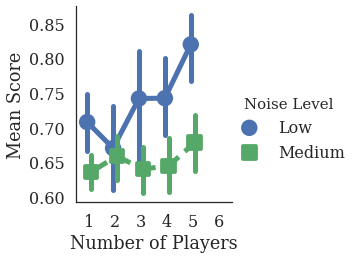

In [31]:

sns.set(font = "serif", context = "poster", style = "white")
sns.despine()       

sns.factorplot("active_n_players", "score", hue = "Noise Level", markers = ["o", "s"], linestyles = ["-","--"], data = data, kind="point", dodge = 0.15, units = "game", order = [1,2,3,4,5,6])

plt.xlabel('Number of Players')
plt.ylabel('Mean Score')

plt.savefig('../../plots/performance-summary.pdf')
    

# State Analysis

## Config

In [3]:
in_dir = '../../processed/'
subset = '1en01'

## Load Data

In [4]:
score, states = game_utils.get_state_scores(in_dir, subset)


states as a function of score


## Plot State Frequency by Score

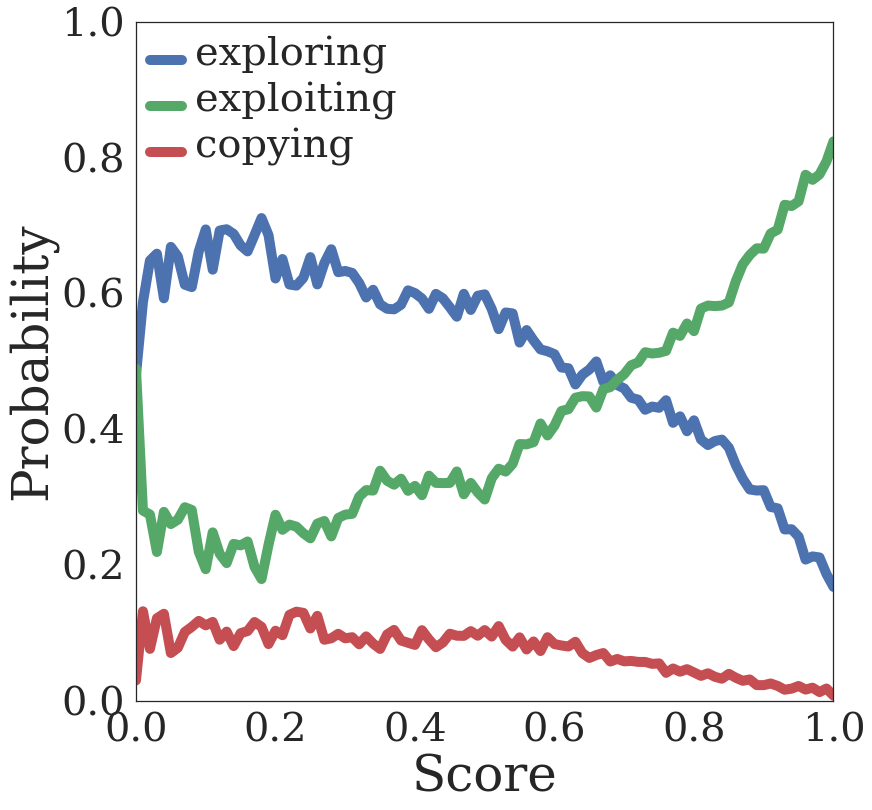

In [13]:
sns.set(font = "serif", context = "poster", style = "white")

fig, ax = plt.subplots()
#plt.rcParams.update(pd.tools.plotting.mpl_stylesheet)                                                                                                                   
#ax.set_color_cycle(['b', 'g', 'y'])                                                                                                                                     
#mpl.rc('font',family='Times New Roman')

from seaborn import color_palette

with color_palette("colorblind"):
    for s in states:
        plt.plot(score,states[s],label = s, lw = 10)
#mpl.rc('font',family='Times New Roman')
plt.xlabel('Score', fontsize=50)
plt.ylabel('Probability', fontsize=50)
plt.xlim((0,1))
plt.ylim((0,1))
plt.legend(loc='upper left')
plt.setp(plt.gca().get_legend().get_texts(), fontsize='40')
ax.tick_params(axis='x', labelsize=40)
ax.tick_params(axis='y', labelsize=40)


fig = plt.gcf()
fig.set_size_inches(12.5,12.5)
fig.savefig('../../plots/states.pdf')#,dpi=100)   